In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#importing required liabraries
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [5]:
img_size=(224,224)
batch_size=32

In [6]:
train_path='/content/train'
valid_path='/content/test'

In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True)

In [8]:
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
#Generating training data
train_generator=train_datagen.flow_from_directory(train_path,target_size=img_size,batch_size=batch_size,class_mode='binary')

Found 2637 images belonging to 2 classes.


In [10]:
#Generating test data

valid_generator=valid_datagen.flow_from_directory(valid_path,target_size=img_size,batch_size=batch_size,class_mode='binary')

Found 660 images belonging to 2 classes.


In [11]:
#importing ResNet50 model
resnet=ResNet50(include_top=False,weights='imagenet',input_shape=img_size+(3,))

In [12]:
#Making ResNet layers non-trainable
for layer in resnet.layers:
  layer.trainable=False

In [13]:
#Adding a flatten layer with droput of 0.5 and an output layer
x=Flatten()(resnet.output)
x=Dropout(0.5)(x)
x=Dense(1,activation='sigmoid')(x)

In [14]:
#importing the model
model=Model(inputs=resnet.input,outputs=x)

In [15]:
#Compiling the model with parameters
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#Training the model
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=30,validation_data=valid_generator,validation_steps=len(valid_generator))

<ipython-input-16-91c510be72ff>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=30,validation_data=valid_generator,validation_steps=len(valid_generator))


Epoch 1/30
83/83 [==============================] - 50s 493ms/step - loss: 1.5339 - accuracy: 0.7914 - val_loss: 2.0340 - val_accuracy: 0.7530
Epoch 2/30
83/83 [==============================] - 41s 490ms/step - loss: 1.4608 - accuracy: 0.8347 - val_loss: 1.3707 - val_accuracy: 0.8576
Epoch 3/30
83/83 [==============================] - 42s 503ms/step - loss: 1.4275 - accuracy: 0.8464 - val_loss: 1.6483 - val_accuracy: 0.8394
Epoch 4/30
83/83 [==============================] - 39s 469ms/step - loss: 1.8395 - accuracy: 0.8400 - val_loss: 1.5070 - val_accuracy: 0.8606
Epoch 5/30
83/83 [==============================] - 39s 474ms/step - loss: 1.6811 - accuracy: 0.8574 - val_loss: 2.0667 - val_accuracy: 0.8303
Epoch 6/30
83/83 [==============================] - 43s 515ms/step - loss: 1.5804 - accuracy: 0.8654 - val_loss: 1.7631 - val_accuracy: 0.8682
Epoch 7/30
83/83 [==============================] - 39s 470ms/step - loss: 1.5547 - accuracy: 0.8623 - val_loss: 3.9275 - val_accuracy: 0.7970

In [17]:
img_size = (224, 224)


In [18]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image


In [19]:
def predict(image_path):
    img = image.load_img(image_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)

    plt.imshow(img)
    print('Predicted class:', 'malignant' if preds[0][0] > 0.5 else 'benign')
    print('Probability:', preds[0][0]  if preds[0][0]>0.5 else 1-preds[0][0])

1/1 [==============================] - 1s 1s/step
Predicted class: malignant
Probability: 1.0


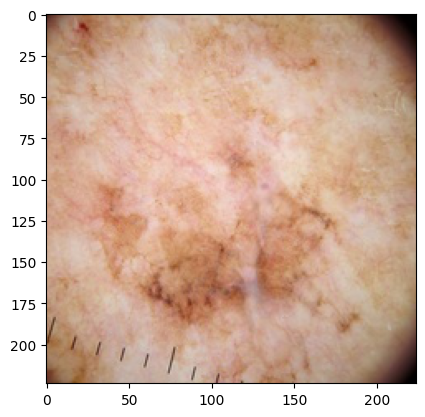

In [20]:
predict("1.jpg")

1/1 [==============================] - 0s 25ms/step
Predicted class: malignant
Probability: 1.0


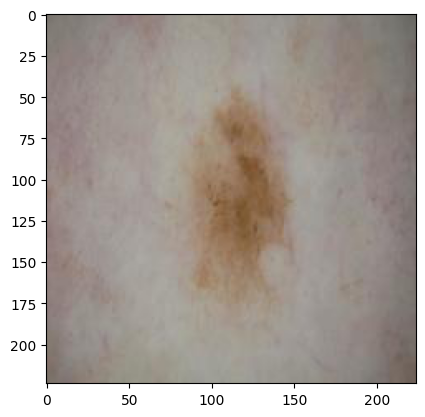

In [21]:
predict("13.jpg")

1/1 [==============================] - 0s 26ms/step
Predicted class: benign
Probability: 1.0


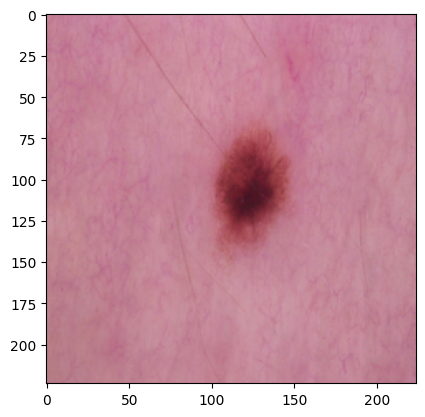

In [22]:
predict("289.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: benign
Probability: 0.9893676824867725


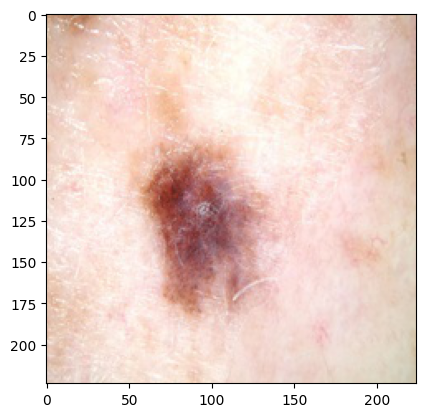

In [23]:
predict("24.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: benign
Probability: 1.0


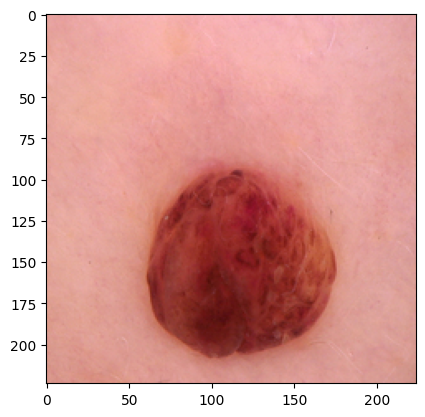

In [24]:
predict("300.jpg")

1/1 [==============================] - 0s 25ms/step
Predicted class: benign
Probability: 1.0


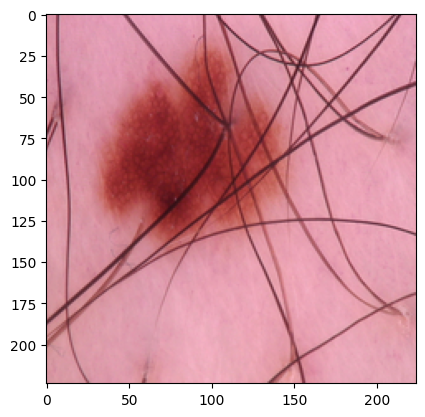

In [25]:
predict("303.jpg")

1/1 [==============================] - 0s 25ms/step
Predicted class: malignant
Probability: 0.99999976


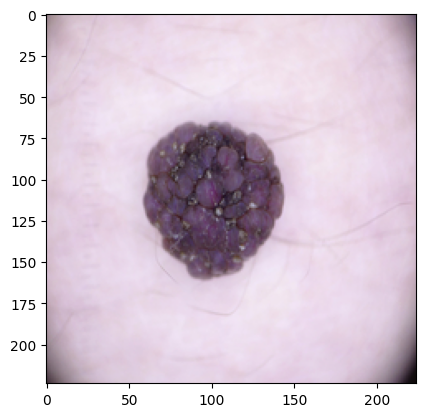

In [26]:
predict("304.jpg")

1/1 [==============================] - 0s 27ms/step
Predicted class: benign
Probability: 1.0


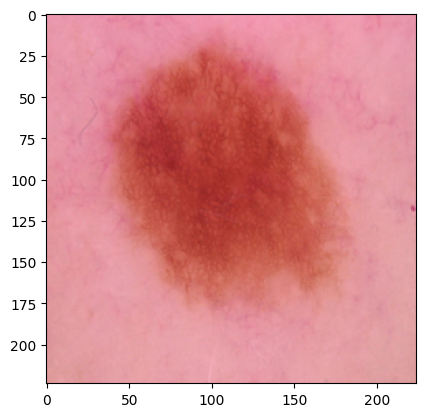

In [27]:
predict("313.jpg")

1/1 [==============================] - 0s 24ms/step
Predicted class: benign
Probability: 1.0


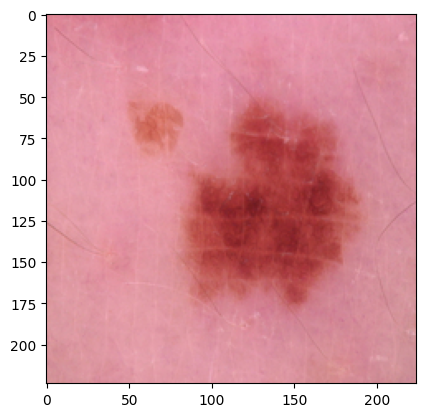

In [28]:
predict("317.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: malignant
Probability: 1.0


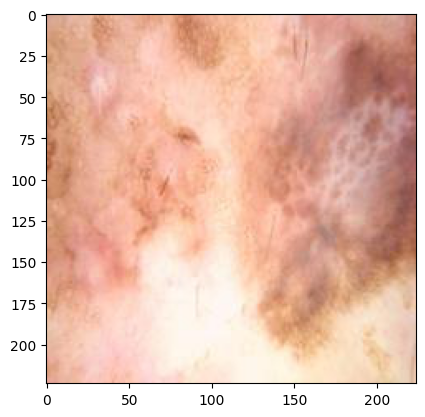

In [29]:
predict("4.jpg")

1/1 [==============================] - 0s 22ms/step
Predicted class: benign
Probability: 0.8180592507123947


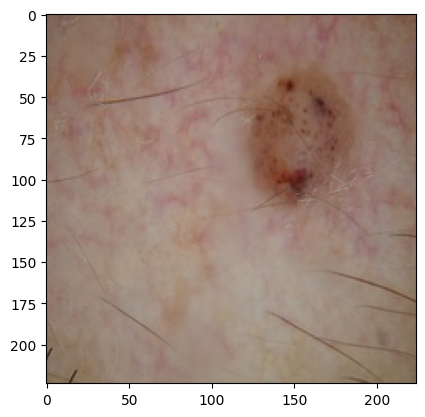

In [30]:
predict("8.jpg")